In [29]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
import yfinance as yf

# Define the stock tickers and the date range
ticker1 = "V"    # Visa
ticker2 = "MA"   # Mastercard
start_date = "2025-01-28"
end_date = "2025-01-29"  # One day later to ensure full day's data

# Download data for Visa and Mastercard
stock1 = yf.download(ticker1, start=start_date, end=end_date, interval="1m")
stock2 = yf.download(ticker2, start=start_date, end=end_date, interval="1m")

# Display the first few rows
print("Visa (V) Stock Data:\n", stock1.head())
print("\nMastercard (MA) Stock Data:\n", stock2.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Visa (V) Stock Data:
 Price                           Close        High         Low        Open  \
Ticker                              V           V           V           V   
Datetime                                                                    
2025-01-28 14:30:00+00:00  333.679993  335.000000  333.497498  334.670013   
2025-01-28 14:31:00+00:00  333.500000  333.970001  333.209991  333.309998   
2025-01-28 14:32:00+00:00  333.399994  333.709991  333.309998  333.445007   
2025-01-28 14:33:00+00:00  334.204987  334.369904  333.589996  333.589996   
2025-01-28 14:34:00+00:00  333.670013  334.236389  333.649994  334.019989   

Price                      Volume  
Ticker                          V  
Datetime                           
2025-01-28 14:30:00+00:00  159746  
2025-01-28 14:31:00+00:00   24077  
2025-01-28 14:32:00+00:00   13035  
2025-01-28 14:33:00+00:00   13059  
2025-01-28 14:34:00+00:00   16114  

Mastercard (MA) Stock Data:
 Price                           Close      

In [5]:
stock1.head

<bound method NDFrame.head of Price                           Close        High         Low        Open  \
Ticker                            XOM         XOM         XOM         XOM   
Datetime                                                                    
2025-01-14 14:30:00+00:00  108.650002  108.790001  108.650002  108.790001   
2025-01-14 14:31:00+00:00  108.839996  108.879997  108.610001  108.699997   
2025-01-14 14:32:00+00:00  109.000000  109.059998  108.879997  108.910004   
2025-01-14 14:33:00+00:00  109.135002  109.150002  108.970001  109.000000   
2025-01-14 14:34:00+00:00  109.059998  109.190002  109.019997  109.120003   
...                               ...         ...         ...         ...   
2025-01-14 20:55:00+00:00  109.650002  109.669998  109.459999  109.459999   
2025-01-14 20:56:00+00:00  109.614998  109.669998  109.550003  109.650002   
2025-01-14 20:57:00+00:00  109.635002  109.680000  109.605003  109.614998   
2025-01-14 20:58:00+00:00  109.605003  109.690

In [7]:
stock2.head

<bound method NDFrame.head of Price                           Close        High         Low        Open  \
Ticker                            CVX         CVX         CVX         CVX   
Datetime                                                                    
2025-01-14 14:30:00+00:00  155.184998  155.350006  155.000000  155.205002   
2025-01-14 14:31:00+00:00  155.675003  155.809998  155.080002  155.080002   
2025-01-14 14:32:00+00:00  155.294998  155.770004  155.240005  155.600098   
2025-01-14 14:33:00+00:00  155.309998  155.479996  155.220001  155.274994   
2025-01-14 14:34:00+00:00  155.179993  155.350006  155.149994  155.350006   
...                               ...         ...         ...         ...   
2025-01-14 20:55:00+00:00  156.750000  156.809998  156.645004  156.645004   
2025-01-14 20:56:00+00:00  156.789993  156.815002  156.750000  156.759995   
2025-01-14 20:57:00+00:00  156.800003  156.850006  156.785004  156.789993   
2025-01-14 20:58:00+00:00  156.729996  156.860

In [7]:
# Combine the two dataframes based on the Datetime index
combined_df = pd.concat([stock1[['Open', 'Close']], stock2[['Open', 'Close']]], axis=1, keys=['Stock1', 'Stock2'])

# Forward fill missing values to handle different rows
combined_df = combined_df.ffill()

# Rename columns for clarity
combined_df.columns = ['Stock1_Open', 'Stock1_Close', 'Stock2_Open', 'Stock2_Close']

# Display the resulting dataframe
print(combined_df)

                           Stock1_Open  Stock1_Close  Stock2_Open  \
Datetime                                                            
2025-01-28 14:30:00+00:00   334.670013    333.679993   546.539978   
2025-01-28 14:31:00+00:00   333.309998    333.500000   545.265015   
2025-01-28 14:32:00+00:00   333.445007    333.399994   542.659973   
2025-01-28 14:33:00+00:00   333.589996    334.204987   544.715027   
2025-01-28 14:34:00+00:00   334.019989    333.670013   546.190002   
...                                ...           ...          ...   
2025-01-28 20:55:00+00:00   335.019989    334.820007   548.400024   
2025-01-28 20:56:00+00:00   334.845001    334.910004   548.190002   
2025-01-28 20:57:00+00:00   334.920013    334.829987   548.219971   
2025-01-28 20:58:00+00:00   334.829987    334.750000   547.559998   
2025-01-28 20:59:00+00:00   334.769989    334.559998   547.520020   

                           Stock2_Close  
Datetime                                 
2025-01-28 14:30:0

In [9]:
p1 = combined_df['Stock1_Close']
p2 = combined_df['Stock2_Close']

In [13]:
from statsmodels.tsa.stattools import coint

In [19]:
score, p_value, _ = coint(p1,p2)
print(f'Engle_Granger cointegration test p-value: {p_value}')

Engle_Granger cointegration test p-value: 0.10770425076331741


In [25]:
S1_0 = combined_df['Stock1_Open'][0]
S2_0 = combined_df['Stock2_Open'][0]
r1=np.log(combined_df['Stock1_Close']/combined_df['Stock1_Close'].shift(1))
r2=np.log(combined_df['Stock2_Close']/combined_df['Stock2_Close'].shift(1))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14744\2736734994.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S1_0 = combined_df['Stock1_Open'][0]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14744\2736734994.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S2_0 = combined_df['Stock2_Open'][0]


In [23]:
mu_1 = r1.mean()*390
mu_2 = r2.mean()*390
sigma_1 = r1.std()*np.sqrt(390)
sigma_2 = r2.std()*np.sqrt(390)
z_0 = 0

In [25]:
from scipy.stats import linregress

In [27]:
result=linregress(np.log(combined_df['Stock1_Close']),np.log(combined_df['Stock2_Close']))
beta=result.slope

In [29]:
gamma = 0.5
delta=1
rho=r1.corr(r2)
T=1
M=len(combined_df['Stock1_Close'])

In [33]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = combined_df['Stock1_Close'][t-1]
    S2[t] = combined_df['Stock2_Close'][t-1]

NameError: name 'T' is not defined

Text(0.5, 1.0, 'Stock Price')

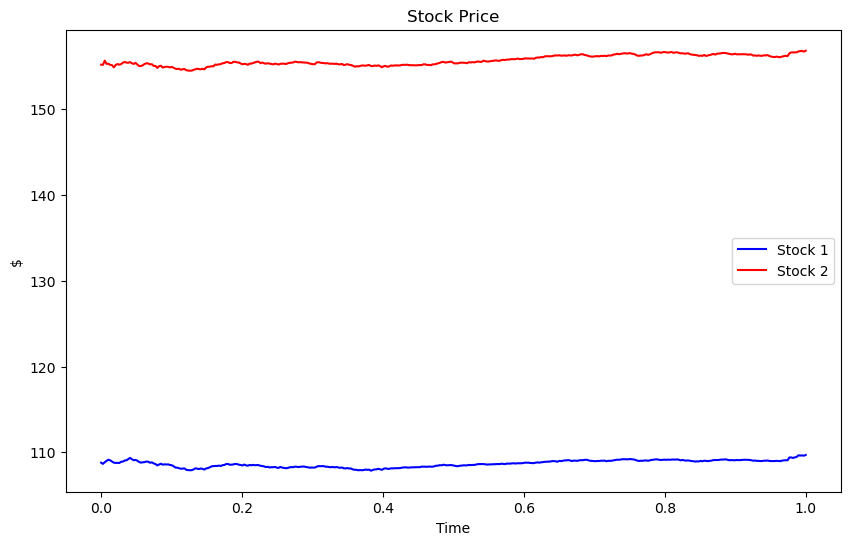

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='Stock 1')
plt.plot(tt, S2, 'r', lw=1.5, label='Stock 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

Text(0.5, 1.0, 'z')

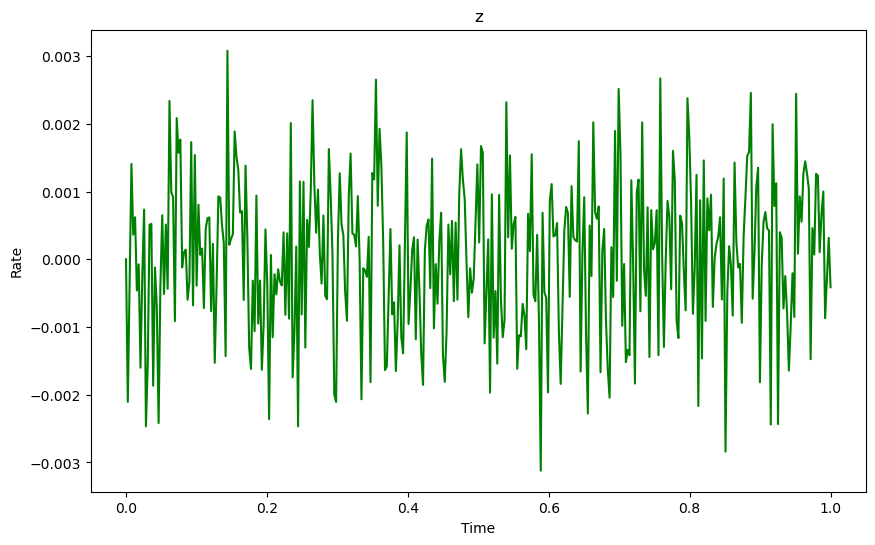

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [37]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

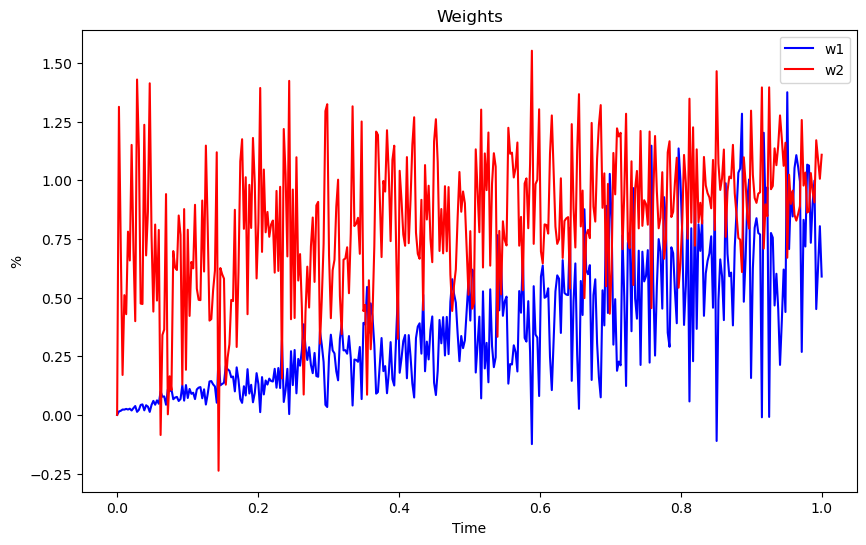

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

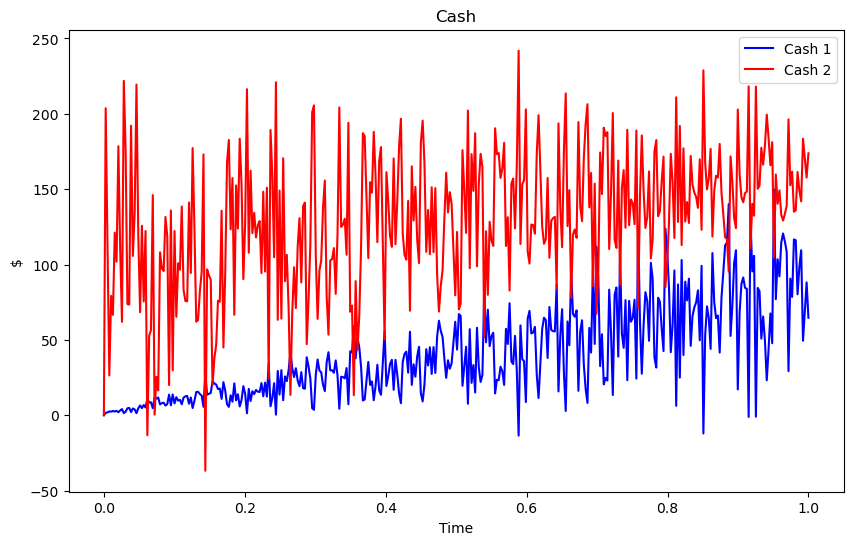

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Cash 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Cash 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [47]:
wealth = abs(Pi_1*S1)+abs(Pi_2*S2)

Text(0.5, 1.0, 'Wealth')

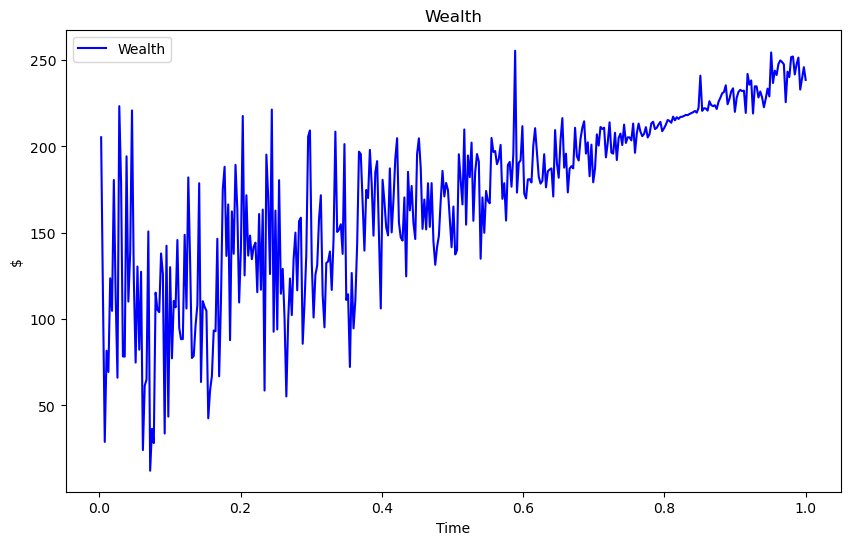

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], wealth[1:], 'b', lw=1.5, label='Wealth')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

Text(0.5, 1.0, 'Comparison')

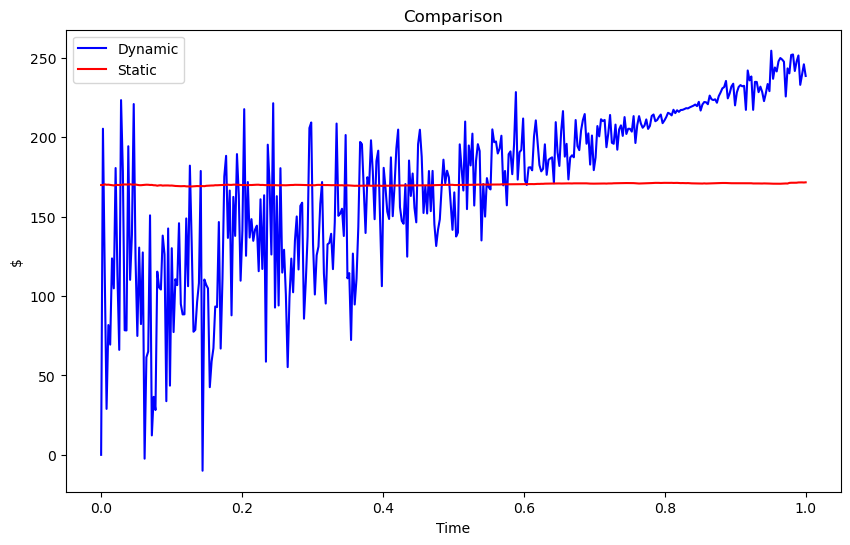

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')